In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn

In [2]:
import numpy as np
import seaborn as sns
from typing import List
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

### Equipo 
- Maravilla Pérez Vianey
- Mondolla Cervantes Erin
- Román Pardo Alejandro

# Práctica 5: Introducción a  Modelos Autoregresivos y de Medias Móviles

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Implementa la función descrita debajo para simular el proceso autoregresivo dado por

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + W_t
$$

In [3]:
def simulate_auto_regressive_process(
    parameters: List[float]=[0.9], 
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
    ):
    
    '''
    This function simulates an AR(p) processwith mean 0.
    
    Inputs:
        parameters: A list of the parameters phi used to compute the autoregression simulation.
                    The first parameter is associated with the time t-1, the second with t-2 and so on.
        timesteps: The number of timesteps to simulate. The first p values of the simulation must 
                    be set to zero (initial conditions).
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''
    p = len(parameters)  # Orden del proceso AR
    x = np.zeros(timesteps)  # Inicializamos la simulacion con ceros
    
    # Generamos el ruido blanco
    w = np.random.normal(loc=mean, scale=std, size=timesteps)
    
    for t in range(p, timesteps):
        # Calculamos la simulacion AR(p) en el tiempo t
        x[t] = np.sum([parameters[i]*x[t-i-1] for i in range(p)]) + w[t]
    
    return x

## Asignación 2

Grafique la simulación de la serie de tiempo del modelo autoregresivo con los parámetros indicados por el profesor. A la derecha de la serie de tiempo debe graficar el correlograma para el proceso simulado.

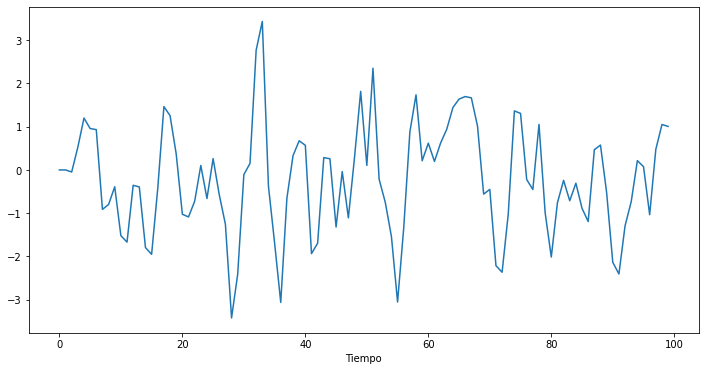

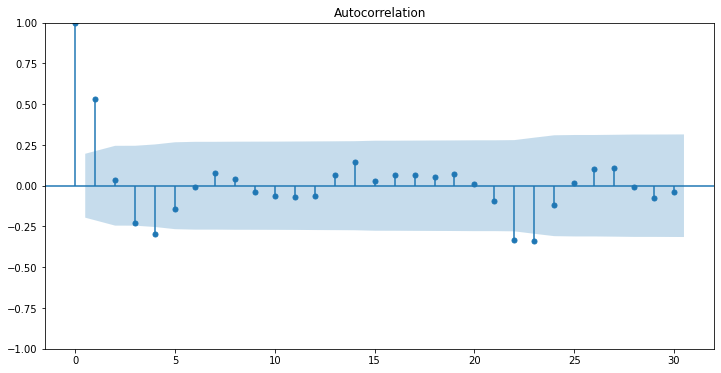

In [4]:
# Establecemos los parametros que se utilizaran 
# Simulacion del proceso AR
x = simulate_auto_regressive_process(parameters=[0.8, -0.4], timesteps=100)

# Grafica de la serie de tiempo
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x)
ax.set_xlabel('Tiempo')

# Correlograma
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(x, ax=ax, lags=30)
plt.show()

## Asignación 3

Implementa la función descrita debajo para simular el proceso de medias móviles dado 

$$
X_t = W_t + \theta_1 W_{t-1} + \theta_2 W_{t-2} + \cdots + \theta_q W_{t-q}
$$

In [5]:
def simulate_moving_averages_process(
    parameters: List[float]=[0.9], 
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
    ):
    
    '''
    This function simulates an MA(q) process with mean 0.
    
    Inputs:
        parameters: A list of the parameters theta used to compute the moving averages simulation
        timesteps: The number of timesteps to simulate.
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''
    # Orden que pertenece a medias móviles (MA)
    q = len(parameters)
    # Inicializa el proceso con puros 0
    x = np.zeros(timesteps) 
    # Generación del ruido blanco
    w = np.random.normal(loc=mean, scale=std, size=timesteps)
    # Simulación del proceso de medias móviles
    for t in range(q, timesteps):
        x[t] = mean # Aquí se toma en cuenta la media para poder inicializar el valor en el tiempo
        for i in range (q):
            x[t]+= parameters[i] * w[t-i-1] 
            # Dentro de esta linea podemos ver una actualización del valor del tiempo tomando en cuenta el ruido usado anteriormente actualiza el valor en el tiempo t usando ruido pasado      
    return x

In [6]:
x = simulate_moving_averages_process() # Igualamos la función a x para poder mandarlo a llamar
x # Visualización de la media movil


array([ 0.        , -0.57883977,  0.47312716, -1.20187039,  0.66075135,
        0.94308074,  0.25353139,  1.8027877 ,  0.08093172, -0.26237163,
       -0.35745288,  1.92621793,  0.79761583, -0.44435309,  0.88800839,
       -0.50474907, -0.05927071, -2.70110376,  0.08650676,  0.04231873,
       -0.18007231,  0.84576846,  1.16469811,  1.74762223,  0.88922971,
       -0.73872151,  0.66297154, -1.42151487,  0.02682174,  0.6795858 ,
       -0.48348927,  0.57089935,  1.64785006,  1.43061532, -0.4467324 ,
       -0.83260335,  0.09360342,  0.4634314 , -0.20134948,  0.03773624,
       -1.14315479,  0.41113875,  1.48970771, -1.48495046,  0.20687358,
        1.2909164 ,  0.3148832 , -0.98608892, -1.40473759, -0.4197619 ,
        0.04580738, -1.78024495, -0.10631559, -0.92262608, -0.40261565,
       -0.63313212,  0.53257212,  0.3006163 ,  0.24011586,  0.09938831,
       -0.83699095,  0.21154899,  0.02062339, -0.3638223 , -1.86811309,
        1.14336804,  0.5691295 ,  0.05831562,  1.57224785, -0.47

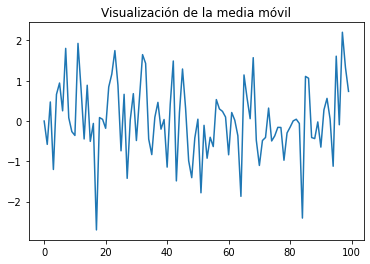

In [7]:
# Graficamente visualizamos nuestra media movil
plt.plot(x)
plt.title('Visualización de la media móvil')
plt.show()